# Data Analysis Project

- Name: Khairunnisa Fitriani
- Email: khairunnisafitriani02@gmail.com 
- ID Dicoding: icakkk

## Questions for Data Exploration

1. Does specific weather conditions affect the number of bicycles rented?
2. What is the distribution of bicycle rentals per month?
3. How can we predict bicycle rentals for the next two months?

## Import Required Libraries

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

The collected data will be used to answer the questions that have been created.

In [362]:
day_df = pd.read_csv('Bike Sharing Dataset\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [363]:
hour_df = pd.read_csv('Bike Sharing Dataset\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

This process is carried out to identify issues such as missing values, invalid values, duplications, and others.

#### Assesing day_dataset

In [364]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [365]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [366]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [367]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


In [368]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Assesing hour_dataset

In [369]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [370]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [371]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [372]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In this section, data with duplicates will be removed, and data with invalid and missing values will be corrected. Additionally, the data type of the 'dteday' column, which is currently of type 'object', will be converted to datetime.

#### Cleaning day dataset

Duplicate data

In [373]:
day_df.duplicated().sum()

0

- There are already 0 duplicate data, so there is no need for deletion.

In [374]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no missing values, so there is no need for cleaning.

In [375]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- There are no inaccurate values, so there is no need for correction.

Ubah Datetime

In [376]:
datetime_columns = ["dteday"]

for column in datetime_columns :
    day_df[column] = pd.to_datetime(day_df[column])

In [377]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Cleaning Hour Dataset

For the hour_dataset, I will not be using it because I will focus on processing the data available in the day_dataset only. However, I will still perform data cleaning on the hour_dataset.

Duplicate Data

In [378]:
hour_df.duplicated().sum()

0

- There are already 0 duplicate data, so there is no need for deletion.

Missing Value

In [379]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no missing values, so there is no need for cleaning.

Inaccurate Value

In [380]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- There are no inaccurate values, so there is no need for correction.

Ubah Datetime

In [381]:
datetime_columns = ["dteday"]

for column in datetime_columns :
    hour_df[column] = pd.to_datetime(hour_df[column])

In [382]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Next, the data that has been cleaned will be converted into a new CSV file named all_data.csv. This all_data.csv file will be used in data analysis as it is the prepared dataset ready for use.

In [383]:
day_df.to_csv("all_data.csv", index=False)

### Exploratory Data Analysis (EDA)

#### Explore weathersit

I want to see how changes in weather affects the number of rentals.

In [384]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
32,33,2011-02-02,1,0,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,72,1454,1526
555,556,2012-07-09,3,1,7,0,1,1,2,0.710833,0.654054,0.683333,0.180975,998,5571,6569
109,110,2011-04-20,2,0,4,0,3,1,1,0.595000,0.564392,0.614167,0.241925,613,3331,3944
137,138,2011-05-18,2,0,5,0,3,1,2,0.550000,0.527158,0.870000,0.201492,536,3319,3855
53,54,2011-02-23,1,0,2,0,3,1,1,0.221739,0.245717,0.423043,0.094113,139,1778,1917


In [385]:
day_df.describe(include="all")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22644\282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [386]:
day_df.weathersit.is_unique

False

In [387]:
weather_casual = day_df.groupby('weathersit')['casual'].sum().reset_index()
weather_casual

,weathersit,casual
0,1,446346
1,2,169776
2,3,3895


In [388]:
weather_registered = day_df.groupby('weathersit')['registered'].sum().reset_index()
weather_registered

,weathersit,registered
0,1,1811606
1,2,827082
2,3,33974


In [389]:
weather_total = day_df.groupby('weathersit')['cnt'].sum().reset_index()
weather_total

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


After reviewing the available data, I will change the 'weathersit' variable into 4 labels:
- 1 for 'Clear, Few clouds, Partly cloudy',
- 2 for 'Mist + Cloudy',
- 3 for 'Light Snow, Light Rain + Thunderstorm',
- 4 for 'Heavy Rain + Ice Pallets + Thunderstorm + Snow + Fog'

In [390]:
weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain + Thunderstorm',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Snow + Fog'
}

# Ganti nilai pada sumbu x dengan label cuaca
weather_casual['weathersit'] = weather_casual['weathersit'].map(weather_labels)
weather_registered['weathersit'] = weather_registered['weathersit'].map(weather_labels)
weather_total['weathersit'] = weather_total['weathersit'].map(weather_labels)


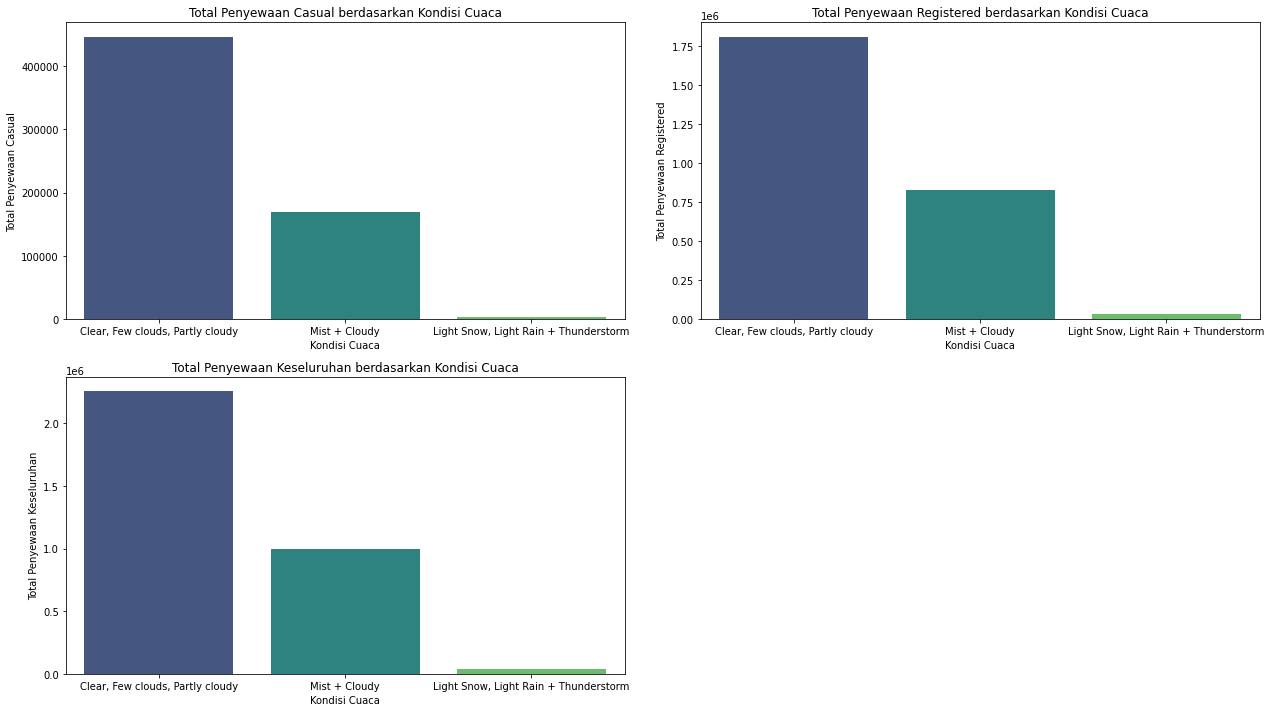

In [391]:
#data visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Plot for total casual rentals
sns.barplot(ax=axes[0, 0], x='weathersit', y='casual', data=weather_casual, palette='viridis')
axes[0, 0].set_xlabel('Weather Condition')
axes[0, 0].set_ylabel('Total Casual Rental')
axes[0, 0].set_title('Total Casual Rentals by Weather Conditions')

# Plot total registered rentals
sns.barplot(ax=axes[0, 1], x='weathersit', y='registered', data=weather_registered, palette='viridis')
axes[0, 1].set_xlabel('Wether Condition')
axes[0, 1].set_ylabel('Total Registered rental')
axes[0, 1].set_title('Total Registered Rentals by Weather Conditions')

# Remove unused subplot
fig.delaxes(axes[1, 1])

# Plot for total overall rentals
sns.barplot(ax=axes[1, 0], x='weathersit', y='cnt', data=weather_total, palette='viridis')
axes[1, 0].set_xlabel('Weather Condition')
axes[1, 0].set_ylabel('Total Overall Rental')
axes[1, 0].set_title('Total Overall Rentals by Weather Conditions')

plt.tight_layout()
plt.show()

#### Explore month

In this month's exploration, I conducted an analysis to gain insights into the distribution of bicycle rentals each month.

In [392]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
91,92,2011-04-02,2,0,4,0,6,0,2,0.315000,0.315637,0.653750,0.197146,898,1354,2252
160,161,2011-06-10,2,0,6,0,5,1,1,0.755000,0.703292,0.605000,0.140554,815,3771,4586
452,453,2012-03-28,2,1,3,0,3,1,1,0.484167,0.470950,0.481250,0.291671,674,5024,5698
636,637,2012-09-28,4,1,9,0,5,1,2,0.619167,0.585863,0.690000,0.164179,1045,6370,7415
212,213,2011-08-01,3,0,8,0,1,1,1,0.771667,0.703292,0.550833,0.156717,729,3537,4266


In [393]:
day_df.describe(include='all')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22644\1011100427.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [394]:
day_df.mnth.is_unique

False

Here I will create month_label which I will use to replace the month codes for easier understanding.

In [402]:
month_label = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'Mei',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Okt',
    11: 'Nov',
    12: 'Des'
}

In [396]:
# Separate the data into the years 2011 and 2012.
data_2011 = day_df[day_df['yr'] == 0].copy()
data_2012 = day_df[day_df['yr'] == 1].copy()

In [397]:
data_2011

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
361,362,2011-12-28,1,0,12,0,3,1,1,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,363,2011-12-29,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999


In [412]:
month_2011 = data_2011.groupby(['mnth'])['cnt'].sum().reset_index()

In [413]:
month_2011['mnth'] = month_2011['mnth'].map(month_label)
month_2011

,mnth,cnt
0,Jan,38189
1,Feb,48215
2,Mar,64045
3,Apr,94870
4,Mei,135821
5,Jun,143512
6,Jul,141341
7,Agu,136691
8,Sep,127418
9,Okt,123511


In [410]:
data_2012

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [411]:
month_2012 = data_2012.groupby(['mnth'])['cnt'].sum().reset_index()
month_2012['mnth'] = month_2012['mnth'].map(month_label)
month_2012

,mnth,cnt
0,Jan,96744
1,Feb,103137
2,Mar,164875
3,Apr,174224
4,Mei,195865
5,Jun,202830
6,Jul,203607
7,Agu,214503
8,Sep,218573
9,Okt,198841


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22644\29487585.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(month_2011['mnth'], rotation=45)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22644\29487585.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(month_2012['mnth'], rotation=45)


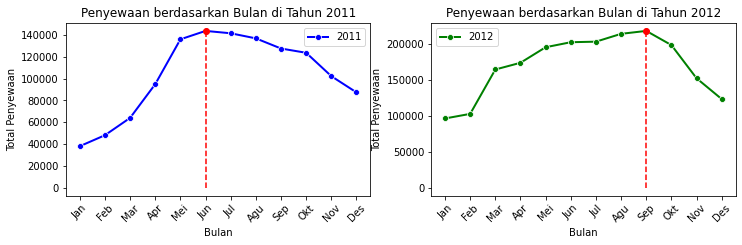

In [414]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.lineplot(ax=axes[0], x=month_2011['mnth'], y=month_2011['cnt'], marker='o',linestyle='-',linewidth=2, color='blue',label='2011')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Rentals')
axes[0].set_title('Rentals by Month in the Year 2011')
axes[0].set_xticklabels(month_2011['mnth'], rotation=45)

# Markers for the highest values in the year 2011.
max_value_2011 = month_2011['cnt'].max()
max_index_2011 = month_2011['cnt'].idxmax()
axes[0].plot(max_index_2011, max_value_2011, marker='o', color='red')
axes[0].vlines(x=max_index_2011, ymin=0, ymax=max_value_2011, linestyle='--', color='red')

sns.lineplot(ax=axes[1], x=month_2012['mnth'], y=month_2012['cnt'], marker='o',linestyle='-',linewidth=2, color='green',label='2012')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Rentals')
axes[1].set_title('Rentals by Month in the Year 2012')
axes[1].set_xticklabels(month_2012['mnth'], rotation=45)

# Markers for the highest values in the year 2012.
max_value_2012 = month_2012['cnt'].max()
max_index_2012 = month_2012['cnt'].idxmax()
axes[1].plot(max_index_2012, max_value_2012, marker='o', color='red')
axes[1].vlines(x=max_index_2012, ymin=0, ymax=max_value_2012, linestyle='--', color='red')

plt.subplots_adjust(bottom=0.4)  # Adjust the bottom margin to 0.4

plt.show()

#### Rental Prediction

In this rental prediction, I will use the linear regression model provided by the sklearn library. I will combine rentals in the years 2011 and 2012, then find predictions for rentals for the next two months.

In [415]:
# To adjust the month values for the year 2011 so that they start from 0.
data_2011['mnth'] = data_2011['mnth'] - 1
# To adjust the month values for the year 2012 so that they start from 12.
data_2012['mnth'] = data_2012['mnth'] + 11

In [427]:
data_combined = pd.concat([data_2011, data_2012])
data_combined

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,0,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,0,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,0,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,23,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,23,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,23,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,23,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [417]:
# Combine the months of the years 2011 and 2012.
data_combined = data_combined.groupby('mnth')['cnt'].sum().reset_index()
data_combined

,mnth,cnt
0,0,38189
1,1,48215
2,2,64045
3,3,94870
4,4,135821
5,5,143512
6,6,141341
7,7,136691
8,8,127418
9,9,123511


In [418]:
# Separate the features (month) and the target (number of rentals) from the data.
X = data_combined[['mnth']]
y = data_combined['cnt']

In [419]:
# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [420]:
# Perform predictions for the months of January and February in the year 2013.
prediksi_jan_2013 = model.predict([[25]])  # Januari 2013 (24 = 12 + 1)
prediksi_feb_2013 = model.predict([[26]])  # Februari 2013 (24 = 12 + 2)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [421]:
print("Prediction of Rentals in January 2013:", prediksi_jan_2013)
print("Prediction of Rentals in February 20133:", prediksi_feb_2013)

Prediksi Penyewaan Januari 2013: [210809.63072464]
Prediksi Penyewaan Februari 2013: [216262.56942029]


In [422]:
data_prediksi_2013 = pd.DataFrame({'mnth': [24, 25], 'cnt': [prediksi_jan_2013, prediksi_feb_2013]})

In [423]:
# Dataframe containing the prediction results.
data_combined = pd.concat([data_combined, data_prediksi_2013])
data_combined

,mnth,cnt
0,0,38189
1,1,48215
2,2,64045
3,3,94870
4,4,135821
5,5,143512
6,6,141341
7,7,136691
8,8,127418
9,9,123511


In [424]:
month_label = {
    0: 'Jan 2011',
    1: 'Feb 2011',
    2: 'Mar 2011',
    3: 'Apr 2011',
    4: 'Mei 2011',
    5: 'Jun 2011',
    6: 'Jul 2011',
    7: 'Aug 2011',
    8: 'Sep 2011',
    9: 'Okt 2011',
    10: 'Nov 2011',
    11: 'Des 2011',
    12: 'Jan 2012',
    13: 'Feb 2012',
    14: 'Mar 2012',
    15: 'Apr 2012',
    16: 'Mei 2012',
    17: 'Jun 2012',
    18: 'Jul 2012',
    19: 'Aug 2012',
    20: 'Sep 2012',
    21: 'Okt 2012',
    22: 'Nov 2012',
    23: 'Des 2012',
    24: 'Jan 2013',
    25: 'Feb 2013'
}

data_combined['mnth'] = data_combined['mnth'].map(month_label)

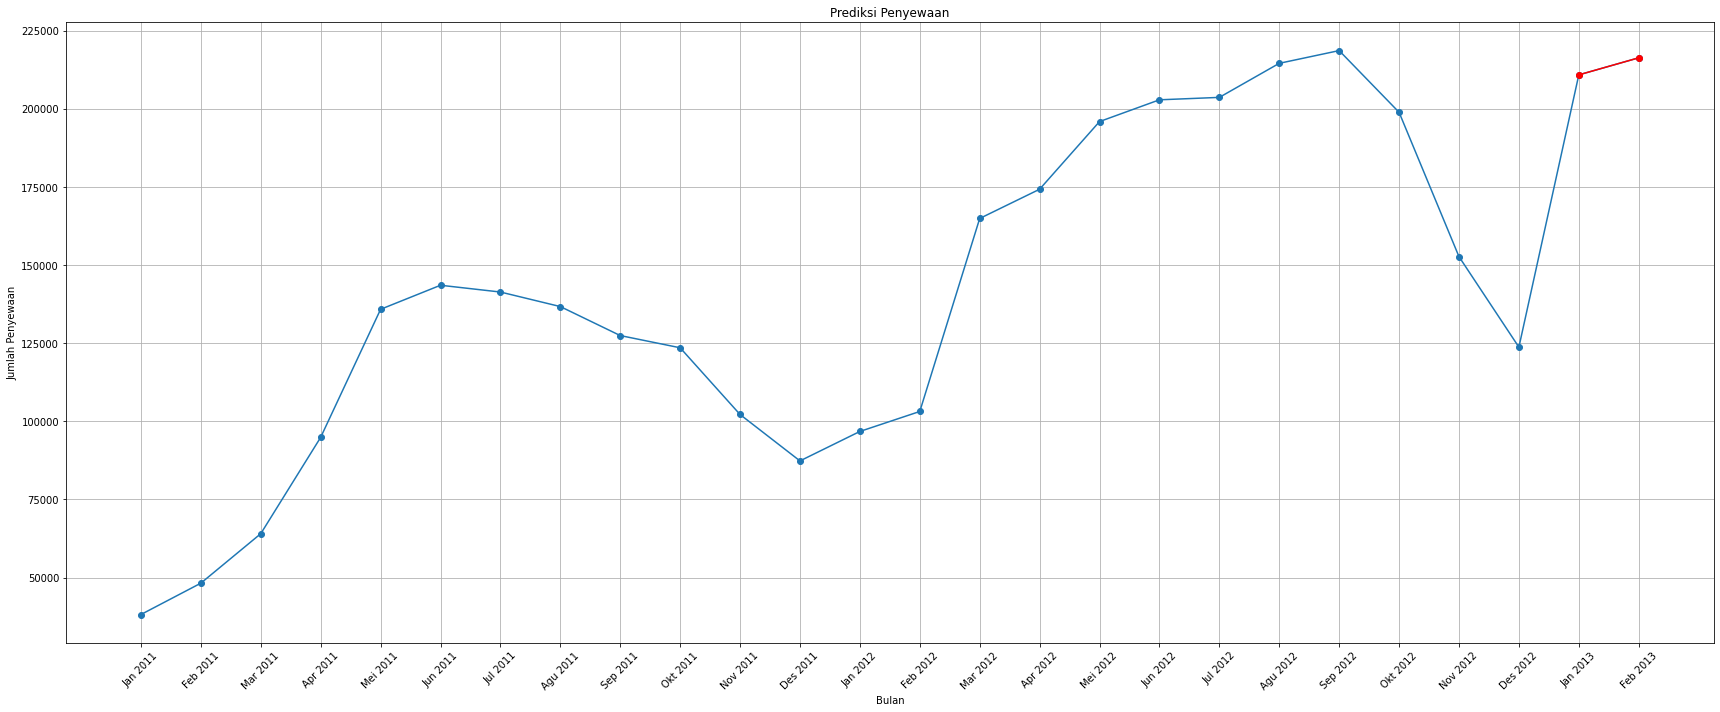

In [425]:
plt.figure(figsize=(24, 10))
plt.plot(data_combined['mnth'], data_combined['cnt'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Rental Predictions')
plt.xticks(data_combined['mnth'], rotation=45)

plt.xticks(range(26))
plt.grid(True)  # Show grid
plt.plot([24, 25], [prediksi_jan_2013, prediksi_feb_2013], marker='o', color='red')

plt.tight_layout()
plt.tight_layout()
plt.show()

In [426]:
data_combined.to_csv("prediction_data.csv", index=False)

### Conclusion

##### Conclusion 1
Based on the visualization, weather conditions significantly affect bicycle rentals. On clear days, bicycle rentals are high, on misty and cloudy days, bicycle rentals decrease significantly, on light snow and light rain days, bicycle rentals are very low (not reaching 100), and on heavy rain days, no bicycles are rented.

##### Conclusion 2
Based on the visualization, the distribution of bicycle rentals in 2011 experienced an increase from January to June, with June reaching the highest number of rentals, then decreasing until December. In 2012, there was another increase until September, with September reaching the highest number of rentals, then decreasing until December.

##### Conclusion 3
Based on the visualization, the linear regression model predicts that bicycle rentals in January and February of 2013 will increase.